In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [132]:
def to_seconds(str):
        splitted=str.split(':')
        return (int(splitted[0])*3600+int(splitted[1])*60+int(splitted[2]))

def string_split(str):
    a=str.split('/')
    day,month,year=int(a[0]),int(a[1]),int(a[2])
    return datetime.datetime(day=day,month=month,year=2000+year)
def month(str):
        month=str.split('/')[1]
        months={1:'January',2:'Feburary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
        return months[int(month)]

In [168]:
class Data:
    #This is the main dataFrame or the parent Dataframe
    df=pd.DataFrame({})
    #This is the child dataFrame derived from the first one.
    df2=pd.DataFrame({})
    MileageArray=np.array([])
    #For storing the average speeds of the given data
    Speeds=np.array([])
    #For storing all the unique dates in the given data
    dates=np.array([])
     #In the constructor we are doing all the precalculations like:
    '''
        1. Sorting the data according to date and time
        2. Reseting the indices after the sorting
        3. Defining the Energy Column
        4. Defining the Energy Consumed Column
        5. Identifying all the unique dates and storing it in 'dates'.
    '''
    def __init__(self,dataframe):
        self.df=dataframe
        

        '''Here we are sorting the data on the basis of both date and time'''
        self.df['DateModified']=self.df['date'].map(string_split)
        self.df['Time_seconds']=self.df['time'].map(to_seconds)
        self.df.sort_values(['DateModified','Time_seconds'],inplace=True)
        self.df.reset_index(inplace=True,drop=True)
        self.df['Energy_Wh']=(self.df['cummulativeDischarge']*self.df['batVolt'])/1000
        self.df['EnergyConsumed']=(self.df['Energy_Wh']).diff(1).fillna(np.nan)
        self.df['Month']=self.df['date'].map(month)
        
        self.df2=self.df.drop(self.df.loc[self.df['EnergyConsumed']<=0].index)
        
        self.dates=self.df2['date'].unique()
        self.CalTimeDifference()
    #Here in this function we are calculating the Time Difference between the columns of the function.
    def CalTimeDifference(self):
        for i in self.dates:
            self.df.loc[self.df['date']==i,'TimeDifference']=(self.df.loc[self.df['date']==i,'Time_seconds']-(self.df.loc[self.df['date']==i,'Time_seconds'].shift(1).fillna(0)))

In [169]:
columns_to_pick=['date','time','speed','odo','batVolt','batCurrent','cummulativeCharge','cummulativeDischarge','chargeStatus','dischargeStatus']
df=pd.read_csv('1monthdata.csv',usecols=columns_to_pick)
#loading the one month data
OneMonth=Data(df)

In [170]:
OneMonth.df

,date,time,speed,odo,batVolt,batCurrent,cummulativeCharge,cummulativeDischarge,chargeStatus,dischargeStatus,DateModified,Time_seconds,Energy_Wh,EnergyConsumed,Month,TimeDifference
0,01/02/23,0:00:04,0,5552,55.6,0.0,2208.14,2426.70,0,0,2023-02-01,4,134.924520,NaN,Feburary,4.0
1,01/02/23,0:00:19,0,5552,55.6,0.0,2208.14,2426.70,0,0,2023-02-01,19,134.924520,0.000000,Feburary,15.0
2,01/02/23,0:00:34,0,5552,55.6,0.0,2208.14,2426.70,0,0,2023-02-01,34,134.924520,0.000000,Feburary,15.0
3,01/02/23,0:00:49,0,5552,55.6,0.0,2208.14,2426.70,0,0,2023-02-01,49,134.924520,0.000000,Feburary,15.0
4,01/02/23,0:01:04,0,5552,55.6,0.0,2208.14,2426.70,0,0,2023-02-01,64,134.924520,0.000000,Feburary,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170937,28/02/23,23:58:54,0,6276,55.6,0.0,2460.34,2773.22,0,0,2023-02-28,86334,154.191032,0.000000,Feburary,15.0
170938,28/02/23,23:59:09,0,6276,55.6,0.0,2460.34,2773.22,0,0,2023-02-28,86349,154.191032,0.000000,Feburary,15.0
170939,28/02/23,23:59:24,0,6276,55.4,0.0,2460.34,2773.22,0,0,2023-02-28,86364,153.636388,-0.554644,Feburary,15.0
170940,28/02/23,23:59:39,0,6276,55.5,0.0,2460.34,2773.22,0,0,2023-02-28,86379,153.913710,0.277322,Feburary,15.0


<h3>Function for calculating the mileage for a given dataframe <b>df</b> and modified dataframe <b>df2</b></h3>

In [171]:
def CalMileage(data):
    # dates=data.df2['date'].unique()
    #print(type(dates))
    # MileageArray=np.array([])
    #distance={}
    for i in data.dates:
        odo=data.df2.loc[data.df2['date']==i,'odo'].iloc[-1]-data.df2.loc[data.df2['date']==i,'odo'].iloc[0]
        #print(odo,end=", ")
        #distance[i]=odo
        if(odo>0):
            data.MileageArray=np.append(data.MileageArray,((((data.df2.loc[data.df2['date']==i,'EnergyConsumed']).sum())/odo)))
        data.df.loc[data.df['date']==i,'mileage']=(((data.df2.loc[data.df2['date']==i,'EnergyConsumed']).sum())/odo) if odo>0 else -1 #for not defined.
CalMileage(OneMonth)
OneMonth.MileageArray

array([ 14.91080278,  14.18066078,  14.46370074,  76.3542495 ,
        32.2289415 ,  13.68202262,  13.61638111,  13.67347707,
        11.2380139 ,  17.11228845,  22.66830467,  14.17972833,
        14.97751311,  15.37750294,  16.99555321,  11.52095049,
        12.51076856,  16.01724233,  22.1474355 ,  15.24381776,
        17.95714377,  11.21051476, 680.373762  ,  12.95308736,
        17.50353474])

In [172]:
indices=OneMonth.MileageArray[OneMonth.MileageArray==-1]
indices

array([], dtype=float64)

In [173]:
def indexDates(date):
    return (date.split('/'))[0]

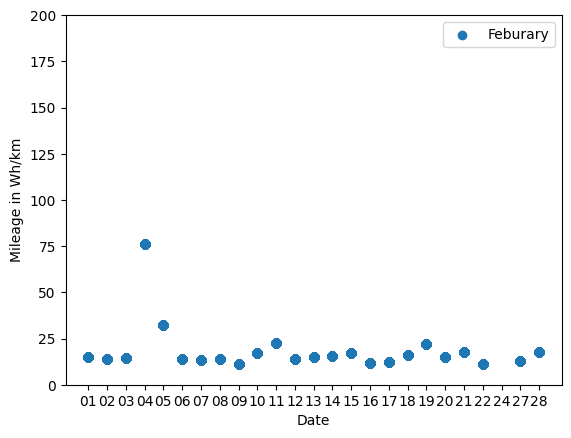

In [174]:
#df2.loc[df1['date']=='04/02/23','EnergyConsumed'].sum()
#df2['DateModified']=df2['date'].map(string_split)
for i in (OneMonth.df['Month'].unique()):
    plt.scatter(OneMonth.df['date'][(OneMonth.df['mileage']!=-1)&(OneMonth.df['Month']==i)].map(indexDates),OneMonth.df['mileage'][(OneMonth.df['mileage']!=-1)&(OneMonth.df['Month']==i)])
plt.ylim(0,200)
plt.ylabel('Mileage in Wh/km')
plt.xlabel('Date')
plt.legend(OneMonth.df['Month'].unique())

<h2>Correlation between mileage and speed
</h2>

In [175]:
def CalAverageSpeed(data):
    for i in data.dates:
        speed=data.df.loc[(data.df['date']==i)&(data.df['speed']!=0),'speed'].mean()
        if(speed>0):
            data.Speeds=np.append(data.Speeds,speed)
        data.df.loc[data.df['date']==i,'AverageSpeed_Kmph']=speed
CalAverageSpeed(OneMonth)
OneMonth.Speeds

array([23.81957187, 25.04153355, 23.95918367,  7.18604651,  8.49295775,
       21.88451444, 23.32153392, 21.48768473, 19.75853659, 22.06060606,
       10.7133758 , 12.08163265, 22.59475219, 24.93406593, 22.92476489,
       22.3907455 , 21.64814815, 10.06547619, 11.875     , 21.50543478,
       19.59638554, 19.33148148, 17.54166667, 23.17663043, 20.0698324 ])

In [176]:
print(OneMonth.Speeds.size,OneMonth.MileageArray.size)

25 25


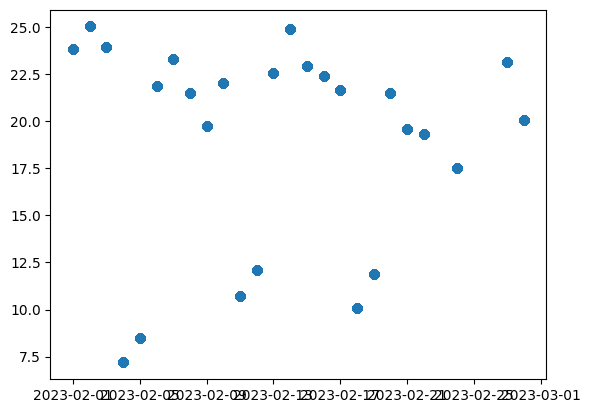

In [177]:
plt.scatter(OneMonth.df['DateModified'],OneMonth.df['AverageSpeed_Kmph'])

(0.0, 100.0)

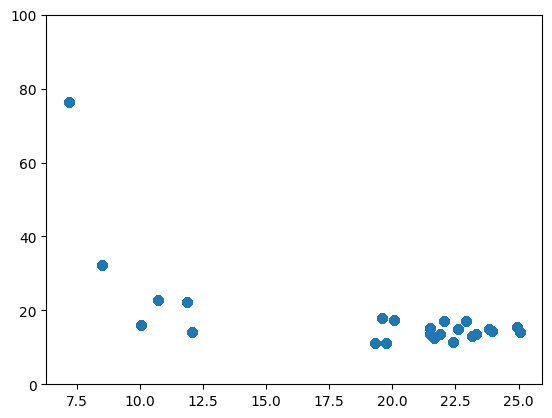

In [178]:
plt.scatter(OneMonth.df['AverageSpeed_Kmph'],OneMonth.df['mileage'])
plt.ylim(0,100)

<h3>Function for find the mean squared error and printing the function</h3>

In [179]:
'''Function to calculate the mean squared error. 'true' is the actual value and 'pred' is the predicted value.'''
def mean_squared_error(true,pred):
    error=0
    for i in range(0,true.size):
        error+=(true[i]-pred[i])**2
    return error
def print_function(coff):
    for i in range(0,coff.size):
        print(coff[i],'x^',coff.size-i-1,end="+ ")

<h3>Finding the corelation between speed and mileage</h3>
<p>In this code below we are basically finding the <strong>best</strong> function of degree n for this we are checking the error value for each value of degree of the polynomial.</p>

383915.522681052*383906.578889801*281736.2283203022*271221.4491116496*151993.6457944131*134007.76377894497*32391.794521652224*14259.879884076166*

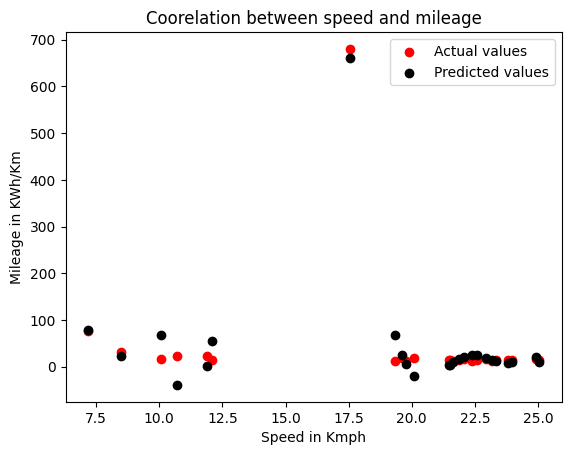

In [180]:
BestFitFunction={}# Dict(key=deg, value=[functionvalues])
min=0
deg=2
for i in range(2,10):
    z=np.polyfit(OneMonth.Speeds,OneMonth.MileageArray,deg=i)
    x=np.poly1d(z)
    y=np.array([])
    for j in OneMonth.Speeds:
        y=np.append(y,x(j))
    error=mean_squared_error(OneMonth.MileageArray,y)
    print(error,end="*")
    match i:
        case 2:
            min=error
            BestFitFunction[deg]=[z,y]
        case default:
            if error<min:
                #print('Reached')
                min=error
                deg=i
                BestFitFunction[deg]=[z,y]
#print(deg,error)
plt.scatter(OneMonth.Speeds,OneMonth.MileageArray,color='red')
plt.scatter(OneMonth.Speeds,BestFitFunction[deg][1],color='black')
plt.xlabel("Speed in Kmph")
plt.ylabel("Mileage in KWh/Km")
plt.legend(['Actual values','Predicted values'])
plt.title('Coorelation between speed and mileage')
plt.show()
#print(BestFitFunction)

In [181]:
print_function(BestFitFunction[deg][0])

-6.850251296726788e-05 x^ 9+ 0.010396203687914496 x^ 8+ -0.6868194652975753 x^ 7+ 25.876904568700237 x^ 6+ -611.613976242166 x^ 5+ 9387.98687321698 x^ 4+ -93444.33167353043 x^ 3+ 580985.6467141634 x^ 2+ -2046284.8992710353 x^ 1+ 3110396.8605360333 x^ 0+ 

In [147]:
ThreeMonth=Data(pd.read_csv('3monthdata.csv',usecols=columns_to_pick))

In [152]:
ThreeMonth.df

,date,time,speed,odo,batVolt,batCurrent,cummulativeCharge,cummulativeDischarge,chargeStatus,dischargeStatus,DateModified,Time_seconds,Energy_Wh,EnergyConsumed,Month,TimeDifference
0,01/12/22,0:00:05,0,4286,55.4,0.0,1806.03,1885.90,0,0,2022-12-01,5,104.478860,NaN,December,5.0
1,01/12/22,0:00:20,0,4286,55.4,0.0,1806.03,1885.90,0,0,2022-12-01,20,104.478860,0.000000,December,15.0
2,01/12/22,0:00:35,0,4286,55.4,0.0,1806.03,1885.90,0,0,2022-12-01,35,104.478860,0.000000,December,15.0
3,01/12/22,0:00:50,0,4286,55.4,0.0,1806.03,1885.90,0,0,2022-12-01,50,104.478860,0.000000,December,15.0
4,01/12/22,0:01:05,0,4286,55.4,0.0,1806.03,1885.90,0,0,2022-12-01,65,104.478860,0.000000,December,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465418,28/02/23,23:58:54,0,6276,55.6,0.0,2460.34,2773.22,0,0,2023-02-28,86334,154.191032,0.000000,Feburary,15.0
465419,28/02/23,23:59:09,0,6276,55.6,0.0,2460.34,2773.22,0,0,2023-02-28,86349,154.191032,0.000000,Feburary,15.0
465420,28/02/23,23:59:24,0,6276,55.4,0.0,2460.34,2773.22,0,0,2023-02-28,86364,153.636388,-0.554644,Feburary,15.0
465421,28/02/23,23:59:39,0,6276,55.5,0.0,2460.34,2773.22,0,0,2023-02-28,86379,153.913710,0.277322,Feburary,15.0


In [182]:
CalMileage(ThreeMonth)
CalAverageSpeed(ThreeMonth)

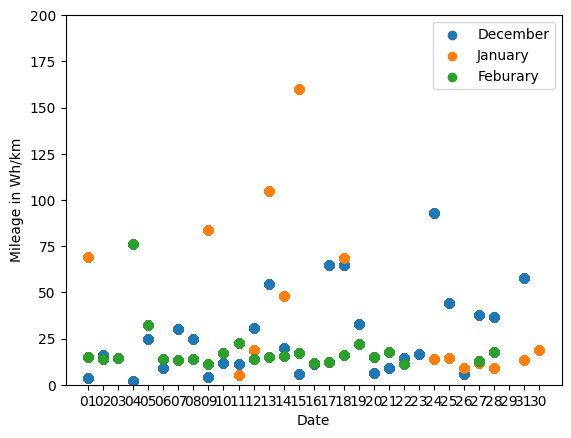

In [183]:
for i in (ThreeMonth.df['Month'].unique()):
    plt.scatter(ThreeMonth.df['date'][(ThreeMonth.df['mileage']!=-1)&(ThreeMonth.df['Month']==i)].map(indexDates),ThreeMonth.df['mileage'][(ThreeMonth.df['mileage']!=-1)&(ThreeMonth.df['Month']==i)])
plt.ylim(0,200)
plt.ylabel('Mileage in Wh/km')
plt.xlabel('Date')
plt.legend(ThreeMonth.df['Month'].unique())
plt.show()

In [190]:
print(len(ThreeMonth.Speeds),len(ThreeMonth.MileageArray))
print(OneMonth.Speeds.size,OneMonth.MileageArray.size)

228 222
25 25


In [202]:
Minerror=0
deg=2
for i in range(2,10):
    z=BestFitFunction[i][0]
    function=np.poly1d(z)
    y=np.array([])
    for j in ThreeMonth.Speeds[:-6]:
        y=np.append(y,function(j))
    error=mean_squared_error(ThreeMonth.MileageArray,y)
    if(i==2):
        Minerror=error
    elif Minerror>error:
        Minerror=error
        deg=i
print(deg)

4


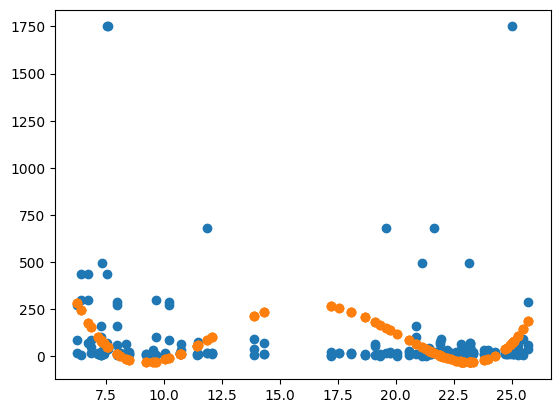

In [203]:
z=BestFitFunction[4][0]
function=np.poly1d(z)
y=np.array([])
for j in ThreeMonth.Speeds[:-6]:
    y=np.append(y,function(j))
plt.scatter(ThreeMonth.Speeds[:-6],ThreeMonth.MileageArray)
plt.scatter(ThreeMonth.Speeds[:-6],y)